Value counts for column: 1


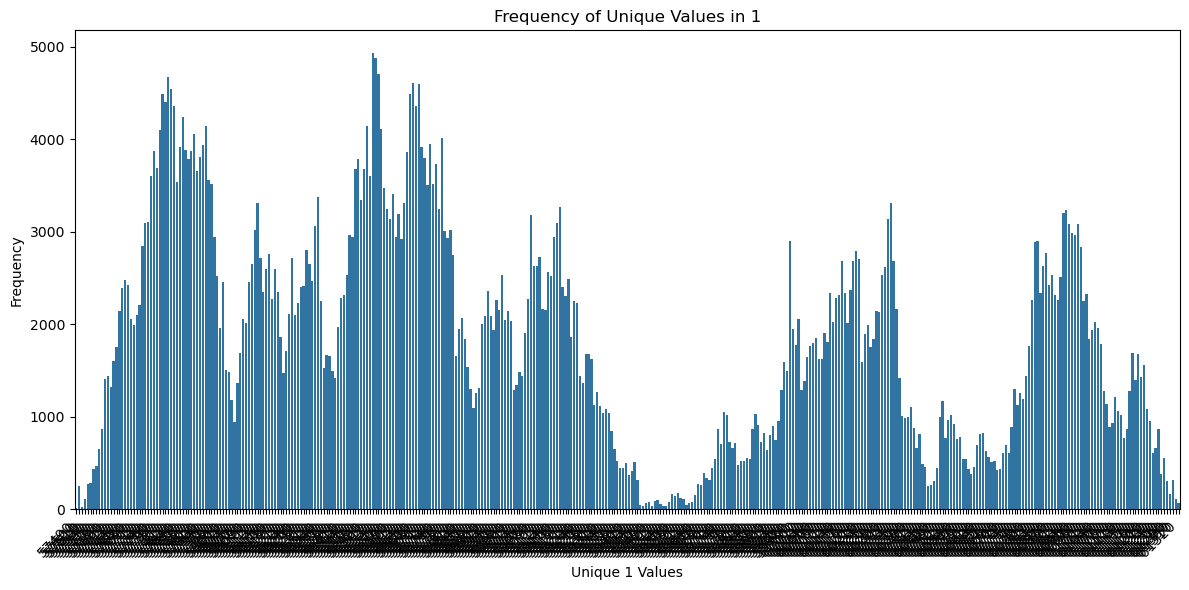

Value counts for column: 2


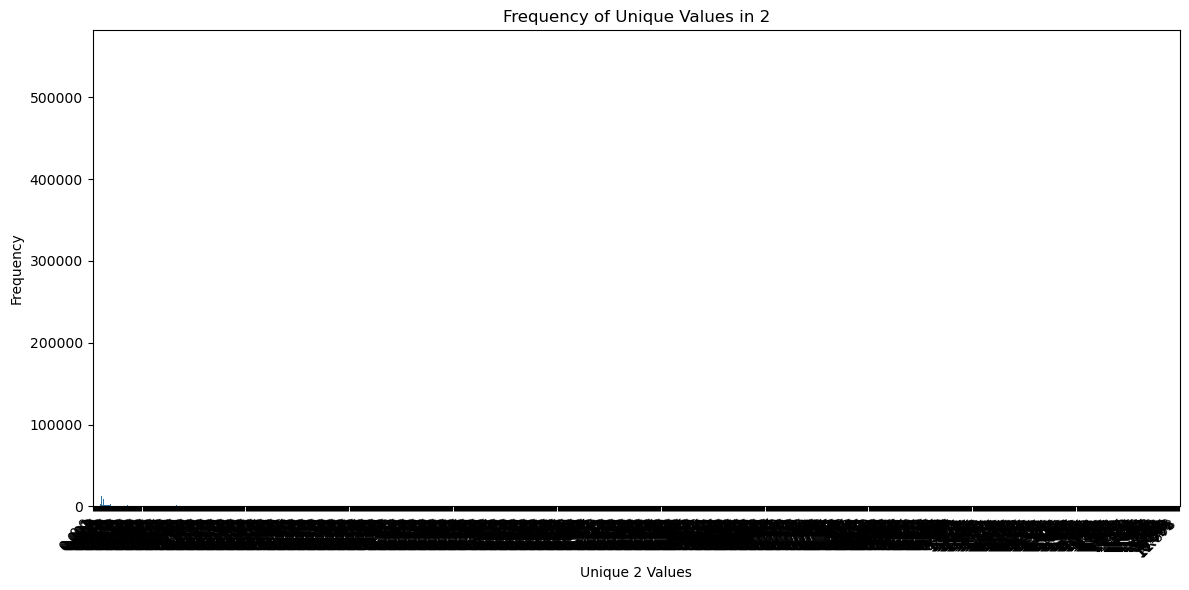

Value counts for column: 5


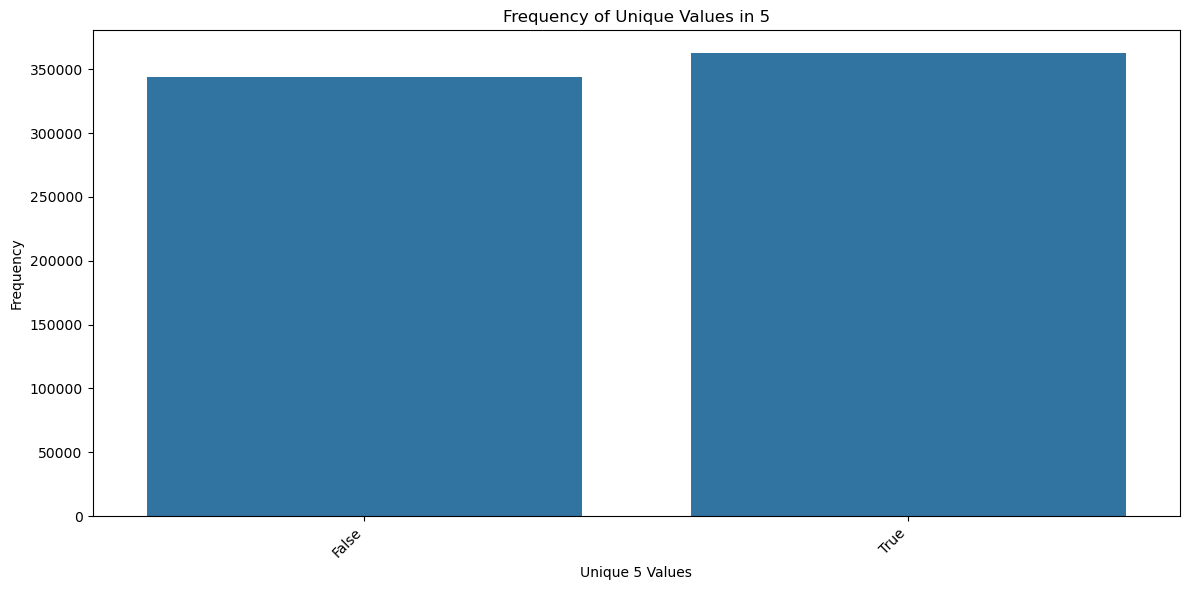

Value counts for column: 6


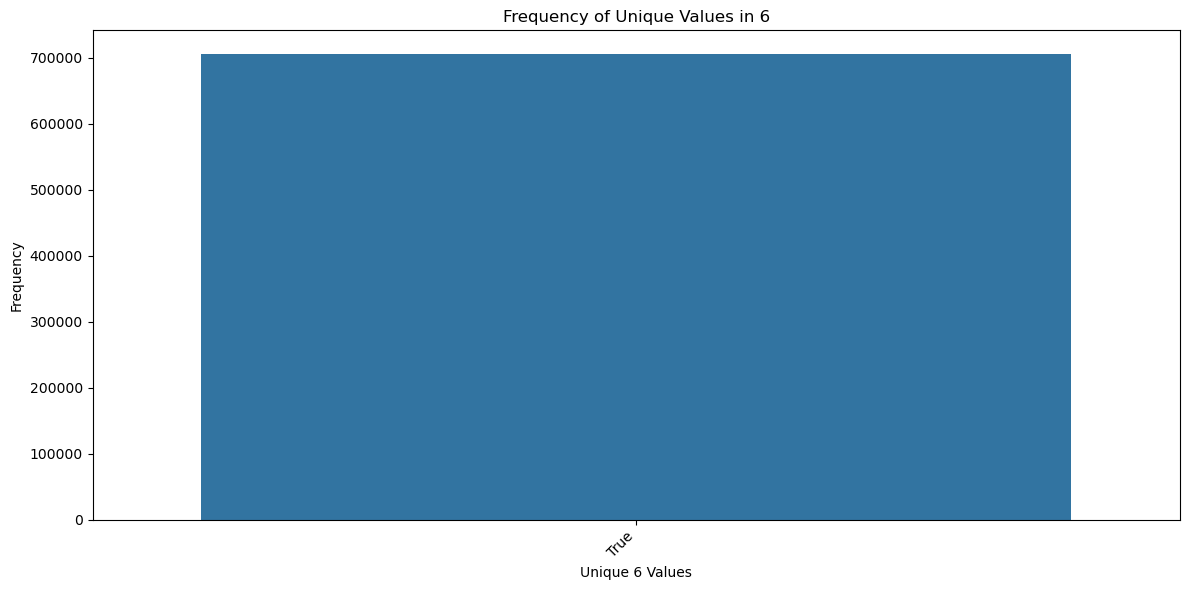

Value counts for column: quote_qty_bins


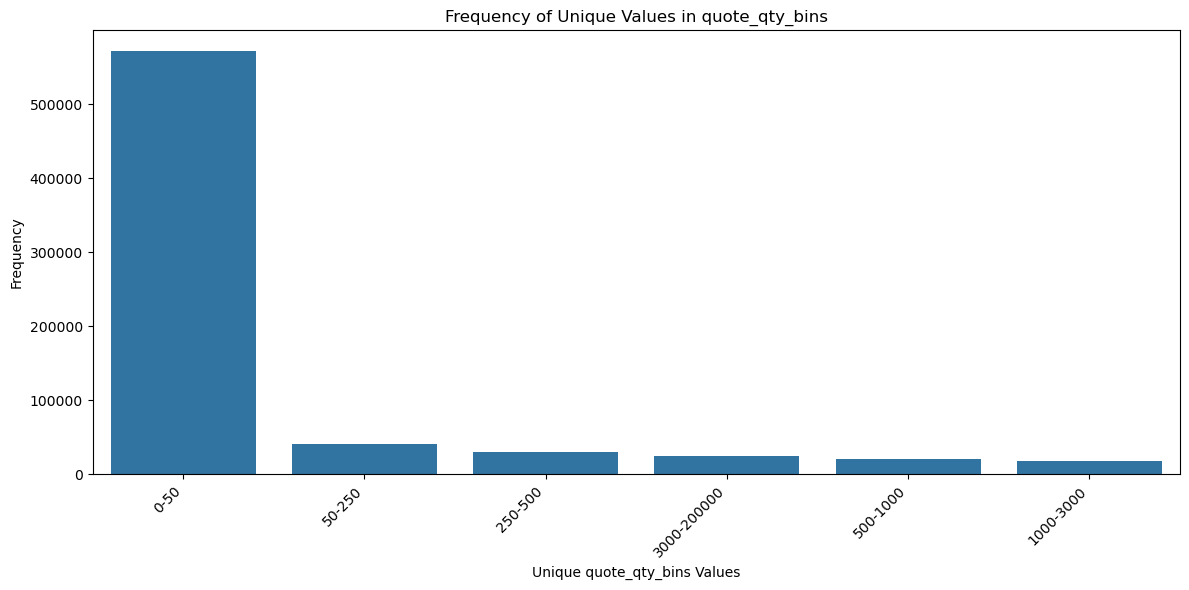

In [18]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots are rendered in the notebook
%matplotlib inline

# Load the processed data
processed_folder = '../data/processed'
test_files = [os.path.join(processed_folder, f) for f in os.listdir(processed_folder) if f.startswith('test_')]

# Concatenate all test files into one DataFrame
test_data = pd.concat([pd.read_csv(file) for file in test_files])

# Plot frequency of each unique value as barplot
for column in test_data.columns:
    print(f"Value counts for column: {column}")
    value_counts = test_data[column].value_counts()

    # Plot frequency of each value as a barplot
    plt.figure(figsize=(12, 6))
    
    # Create barplot for unique values' frequency
    sns.barplot(x=value_counts.index, y=value_counts.values)
    
    # Set plot title and labels
    plt.title(f"Frequency of Unique Values in {column}")
    plt.xlabel(f"Unique {column} Values")
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability if necessary
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
